In [129]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import os.path as path
import wget
import sympy as sp
from scipy import integrate
from celluloid import Camera

In [158]:
def f(t):
    return t
def Fourier(x,n):
  return 2*((-1)**(n-1))*np.sin(n*x)/n

In [159]:
L = np.pi
x = np.linspace(-L, L,1000)

In [160]:
n = 1
armonicos = 50
F = 0

In [161]:
fig = plt.figure(figsize=(4,4))
camera = Camera(fig)

<Figure size 288x288 with 0 Axes>

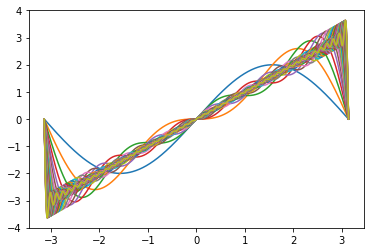

In [162]:
while n < armonicos:
    F += Fourier(x,n)
    plt.plot(x,F)
    camera.snap()
    n += 1 

In [163]:
animation = camera.animate()
animation.save('Fourier.mp4')

1.017343061984441


In [164]:
def Riemmann(n):
  x = 0
  for i in range(1000):
    x += 1/((i+1)**n)
  return x

In [166]:
x = Riemmann(6)  
print(x) 

1.017343061984441


In [17]:
#Derivada espectral

In [18]:
def f(x):
    return np.exp(-0.1*x)*np.sin(x)

def Derivada_exacta(x):
    return -0.1*np.exp(-0.1*x)*np.sin(x)+np.cos(x)*np.exp(-0.1*x)

def Derivada_derecha(x):
    return (f(x)-f(x-0.1))/0.1

In [19]:
Points=100
L=2*np.pi
x=np.linspace(-L,L,Points,endpoint=True)
x_step=(x[1]-x[0])
N=np.size(x)

In [20]:
FFT=np.fft.fft(f(x))
exacta=Derivada_exacta(x)

In [21]:
FFTMag = np.abs(FFT)
omega=np.fft.fftfreq(N,np.max(exacta)/Points)
FFT*=1j*omega
espectral=np.fft.ifft(FFT)

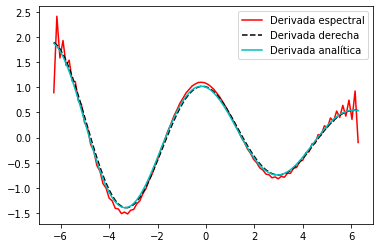

In [22]:
plt.figure()
plt.plot(x,np.real(espectral),color='r',label='Derivada espectral')
plt.plot(x,Derivada_derecha(x),'--',color='k',label='Derivada derecha')
plt.plot(x,Derivada_exacta(x),'-',color='c',label='Derivada analítica')
plt.legend()

In [23]:
file = "Data/ManchasSolares.dat"
url = "https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionales/ManchasSolares.dat"
if not path.exists(file):
    Path_=wget.download(url,file)
    print("Descargado")
else:
    Path_=file

In [104]:
data = np.loadtxt(Path_)
i = data[:,0] >= 1900
a = data[i]
x = a[:,0] + a[:,1]/12
b = a[:,3] - np.mean(a[:,3])

w  = np.zeros((len(x),2))
w[:,0]=x
w[:,1]=b

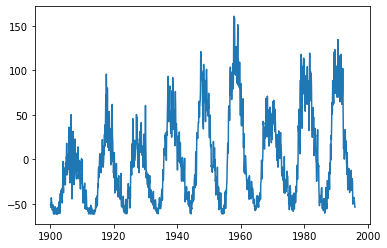

In [105]:
plt.plot(w[:,0],w[:,1])

In [106]:
fft = np.fft.fft(w[:,1])

In [107]:
Npoints = len(b)

In [108]:
Frecuencias = np.fft.fftfreq(Npoints,1)
ffta = np.abs(fft)

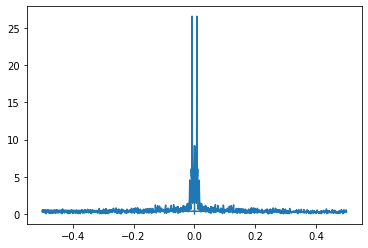

In [109]:
plt.plot(Frecuencias, np.abs(fft/Npoints))

In [110]:
mask = Frecuencias <0
fft[mask] = 0

ii = fft != np.max(fft)
fft[ii]= 0

In [111]:
NewFreq = np.arange(len(fft))

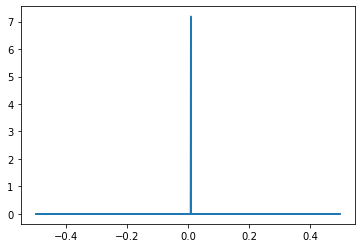

In [112]:
plt.plot(Frecuencias,np.abs(fft/Npoints))

In [143]:
len(fft)/2

576.0

In [153]:
re = np.fft.irfft(fft[:577])

In [154]:
len(w[:,0])

1152

In [155]:
len(re)

1152

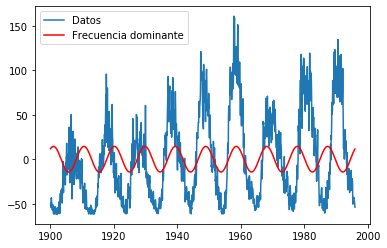

In [156]:
plt.plot(w[:,0],w[:,1], label = "Datos")
plt.plot(w[:,0],re,color = "red", label = "Frecuencia dominante")
plt.legend()

array([5.92217347, 6.0317627 , 6.13685862, ..., 5.56727867, 5.68984492,
       5.80817257])